1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

The probablility that in a single year there is more than 15 huricanes is 0.0008444930803583883
Z score: 3.4661629670697414
The Z score is greater than 3 so the value of 15 is statistically significant
The p-value is: 0.00026397158691493505
This show the probability of getting a Z score greater than the one we get when we measure 15 hurricanes


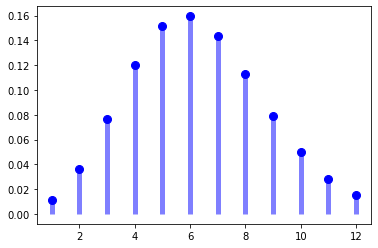

In [1]:
#complete
from scipy.stats import poisson, norm
import matplotlib.pyplot as plt
import numpy as np
import math

#the null hypotheses is: 15 and 6.3 hurricanes are signifficantly different.
# the level of significance is set to 0.05
# the test stastic used is the Z test. It is used to quantify how different the numbers are
# we are comparing a measurement to a mean. The z test is the number of standard deviations from the mean
# thus the z test quantifies how different the numbers are. 

# the p value is the probability of computing a z score of 3.46 given that 15 hurricanes is significantly different.

fig, ax = plt.subplots(1, 1)

mu = 6.3
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

fif = 1 - poisson.cdf(15, mu)
Z = (15-mu)/math.sqrt(var)
print('The probablility that in a single year there is more than 15 huricanes is', fif)
print('Z score:', Z)
print('The Z score is greater than 3 so the value of 15 is statistically significant')

#only one side as we can't count -8.3 hurricanes. (6.3-15)
pvalue = (1. - norm.cdf(Z))
print("The p-value is:",pvalue)
print("This show the probability of getting a Z score greater than the one we get when we measure 15 hurricanes")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [15]:
#complete
from math import sqrt
import numpy as np
import scipy.stats as stats

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

stderror = np.sqrt((pre.var()+post.var())/2.)
n = 10
T = (np.mean(pre) - np.mean(post))/(stderror*sqrt(2/n))

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
#the probability we get a test stastistic that proves are null hypothesis

print(pvalue)
print('The pvalue is less than 0.25 so there is no effect on blood pressure due to the lamps.')

0.0031489409354536393
The pvalue is less than 0.25 so there is no effect on blood pressure due to the lamps.


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

<ipython-input-16-ff926a01eb65>:17: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1/samp_freq


The period with the highest weight is about 10 years.


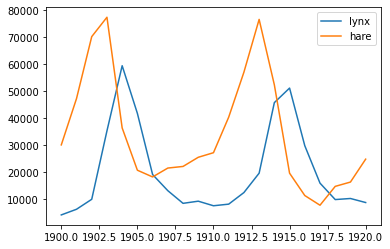

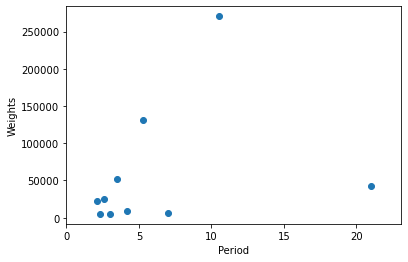

In [16]:
#complete
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np

time_step = 0.01#years

df = pd.read_csv('populations.txt', delimiter = '\t')
#df['year']
plt.plot(df['# year'],df['lynx'], label = 'lynx')
plt.plot(df['# year'],df['hare'], label = 'hare')
plt.legend()
hare = df['hare'].to_numpy()

fft = fftpack.fft(hare)
samp_freq = fftpack.fftfreq(hare.size,1)
periods = 1/samp_freq
weights = np.abs(fft)#weights of the fourrier components


freqcont = plt.figure()
plt.scatter(periods, weights)
plt.xlim(0)
plt.xlabel('Period')
plt.ylabel('Weights')

print('The period with the highest weight is about 10 years. This is determemend as the period in population.')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.


The range selected is -0.04 to 0.04, this corrosponds to the first and last 30 items in the fft array for each row of the image.


Text(0.5, 1.0, 'Clear Moon')

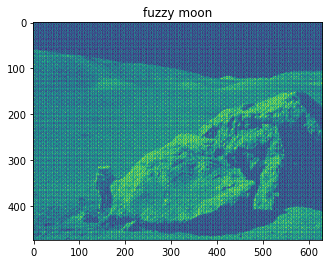

<Figure size 432x288 with 0 Axes>

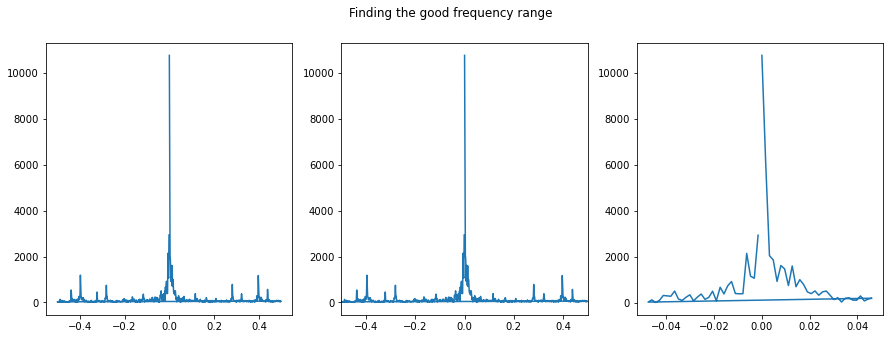

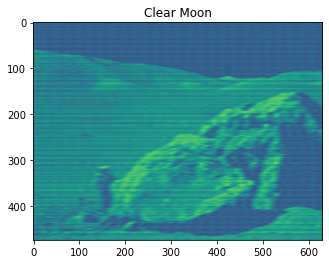

In [17]:
#complete
moon = plt.imread("moonlanding.png")
from matplotlib.colors import LogNorm
    # A logarithmic colormap
plt.imshow(moon)
plt.title('fuzzy moon')

from scipy import fftpack
fft = fftpack.fft2(moon)

figfft = plt.figure()
#plt.imshow(np.abs(fft), norm=LogNorm(vmin=5))
#plt.colorbar()

#def freqAnalysis(row):
figline, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5))
freq_samp = fftpack.fftfreq(len(fft[1]), d = 1)
weights = np.abs(fft[1])
ax1.plot(freq_samp, weights)
ax2.plot(freq_samp, weights)
ax2.set_xlim([-0.5, 0.5])
wid = 30
ax3.plot(np.hstack([freq_samp[:wid],freq_samp[-wid:]]), np.hstack([weights[:wid],weights[-wid:]]))
figline.suptitle('Finding the good frequency range')

print('\nThe range selected is -0.04 to 0.04, this corrosponds to the first and last 30 items in the fft array for each row of the image.')

fftnew = fft.copy()
for i in range(fft.shape[0]):
    fftnew[i][wid:-wid] = 0
    
    #im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

clearmoon = fftpack.ifft2(fftnew).real
figclearmoon = plt.figure()
plt.imshow(clearmoon)
plt.title('Clear Moon')